# Automatic Jupyter Notebook : Scenario1
This is an auto-generated notebook generated using the classifAI DSL on : 22/01/2023 17:42:30

## Selection of data

In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
X = []
Y = []
classes = ['0', '1', '2', '3']
classes_count = {'0': 1000, '1': 1000, '2': 1000, '3': 1000}
for class_ in classes:
	count = 0
	for file in os.listdir(f'input_data/' + class_):
		if count == classes_count[class_]:
			break
		X.append(np.array(Image.open(f'input_data/' + class_ + '/' + file)))
		Y.append(class_)
		count += 1
X=np.array(X)
Y=np.array(Y)
print("X shape :",X.shape)
print("Y shape :",Y.shape)

X shape : (4000, 28, 28)
Y shape : (4000,)


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Preprocessing of data

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

## Transformation of data

### Normalization of data

In [5]:
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train = X_train / 255
X_test = X_test / 255
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 28, 28)
X test shape : (800, 28, 28)


### Reshaping of data

In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print("X train shape :",X_train.shape)
print("X train shape :",X_test.shape)

X train shape : (3200, 28, 28, 1)
X train shape : (800, 28, 28, 1)


## Data Mining

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Keeping track of the models and the metrics

In [8]:
models_metrics = dict()

### Classifier : rank 1 - number 1

Flattening the data of this classifier

In [9]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [10]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 117,508
Trainable params: 117,508
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [11]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-1"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 2s 5ms/step - loss: 1.5927 - accuracy: 0.2491
Epoch 2/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3859 - accuracy: 0.2500
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3859 - accuracy: 0.2500
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3859 - accuracy: 0.2500
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3859 - accuracy: 0.2500
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3859 - accuracy: 0.2500
Epoch 7/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3859 - accuracy: 0.2500
Epoch 8/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3859 - accuracy: 0.2500
Epoch 9/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3859 - accuracy: 0.2500
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 1.3863 - accuracy: 0.2500
L

### Classifier : rank 1 - number 2

Flattening the data of this classifier

In [12]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [13]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 117,508
Trainable params: 117,508
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [14]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-2"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 1s 5ms/step - loss: 4.6721 - accuracy: 0.2775
Epoch 2/10
100/100 [==============================] - 1s 6ms/step - loss: 4.5515 - accuracy: 0.3191
Epoch 3/10
100/100 [==============================] - 1s 5ms/step - loss: 4.5164 - accuracy: 0.3416
Epoch 4/10
100/100 [==============================] - 1s 5ms/step - loss: 4.5138 - accuracy: 0.3566
Epoch 5/10
100/100 [==============================] - 1s 5ms/step - loss: 4.5090 - accuracy: 0.3650
Epoch 6/10
100/100 [==============================] - 1s 5ms/step - loss: 4.4919 - accuracy: 0.3497
Epoch 7/10
100/100 [==============================] - 0s 5ms/step - loss: 4.4755 - accuracy: 0.3516
Epoch 8/10
100/100 [==============================] - 0s 5ms/step - loss: 4.4739 - accuracy: 0.3584
Epoch 9/10
100/100 [==============================] - 0s 4ms/step - loss: 4.4640 - accuracy: 0.3750
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 4.2512 - accuracy: 0.3775
L

### Classifier : rank 1 - number 3

Flattening the data of this classifier

In [15]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [16]:
model = Sequential()
model.add(Dense(128, activation="softmax", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 4)                 516       
                                                                 
Total params: 117,508
Trainable params: 117,508
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [17]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-3"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 1s 3ms/step - loss: 1.4233 - accuracy: 0.2541
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 5/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 6/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 7/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 8/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 9/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
L

### Classifier : rank 1 - number 4

Flattening the data of this classifier

In [18]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [19]:
model = Sequential()
model.add(Dense(128, activation="softmax", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
Total params: 117,508
Trainable params: 117,508
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [20]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-4"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 1s 3ms/step - loss: 4.5908 - accuracy: 0.4422
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 2.0596 - accuracy: 0.3438
Epoch 3/10
100/100 [==============================] - 0s 5ms/step - loss: 1.2018 - accuracy: 0.2500
Epoch 4/10
100/100 [==============================] - 0s 5ms/step - loss: 1.1840 - accuracy: 0.2500
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 1.4010 - accuracy: 0.2500
Epoch 6/10
100/100 [==============================] - 1s 5ms/step - loss: 1.1496 - accuracy: 0.2500
Epoch 7/10
100/100 [==============================] - 0s 5ms/step - loss: 1.1727 - accuracy: 0.2500
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 1.1727 - accuracy: 0.2500
Epoch 9/10
100/100 [==============================] - 0s 5ms/step - loss: 1.1727 - accuracy: 0.2500
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 1.1611 - accuracy: 0.2500
L

### Classifier : rank 1 - number 5

Flattening the data of this classifier

In [21]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [22]:
model = Sequential()
model.add(Dense(128, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 4)                 516       
                                                                 
Total params: 117,508
Trainable params: 117,508
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [23]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-5"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 4/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 5/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 6/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 7/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 9/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 1.3863 - accuracy: 0.2500
L

### Classifier : rank 1 - number 6

Flattening the data of this classifier

In [24]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [25]:
model = Sequential()
model.add(Dense(128, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 4)                 516       
                                                                 
Total params: 117,508
Trainable params: 117,508
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [26]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-6"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 1.6893 - accuracy: 0.2616
Epoch 2/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 8/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 9/10
100/100 [==============================] - 0s 3ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
L

### Classifier : rank 1 - number 7

Flattening the data of this classifier

In [27]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [28]:
model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 4)                 516       
                                                                 
Total params: 234,372
Trainable params: 234,372
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [29]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-7"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 2s 6ms/step - loss: 1.5664 - accuracy: 0.2600
Epoch 2/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 3/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 4/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 5/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 8/10
100/100 [==============================] - 1s 8ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 9/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
L

### Classifier : rank 1 - number 8

Flattening the data of this classifier

In [30]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [31]:
model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 4)                 516       
                                                                 
Total params: 234,372
Trainable params: 234,372
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [32]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-8"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 2s 5ms/step - loss: 1.6401 - accuracy: 0.2525
Epoch 2/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3807 - accuracy: 0.2500
Epoch 3/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3807 - accuracy: 0.2500
Epoch 4/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3807 - accuracy: 0.2500
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3807 - accuracy: 0.2500
Epoch 6/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3807 - accuracy: 0.2500
Epoch 7/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3807 - accuracy: 0.2500
Epoch 8/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3807 - accuracy: 0.2500
Epoch 9/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3807 - accuracy: 0.2500
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 1.2910 - accuracy: 0.2500
L

### Classifier : rank 1 - number 9

Flattening the data of this classifier

In [33]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [34]:
model = Sequential()
model.add(Dense(256, activation="softmax", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               200960    
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 4)                 516       
                                                                 
Total params: 234,372
Trainable params: 234,372
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [35]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-9"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 1s 6ms/step - loss: 1.4374 - accuracy: 0.2491
Epoch 2/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 4/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 7/10
100/100 [==============================] - 1s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 8/10
100/100 [==============================] - 0s 5ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 9/10
100/100 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 1.3863 - accuracy: 0.2500
L

### Classifier : rank 1 - number 10

Flattening the data of this classifier

In [36]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [37]:
model = Sequential()
model.add(Dense(256, activation="softmax", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 256)               200960    
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 4)                 516       
                                                                 
Total params: 234,372
Trainable params: 234,372
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [38]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-10"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 2s 6ms/step - loss: 12.1541 - accuracy: 0.2459
Epoch 2/10
100/100 [==============================] - 1s 5ms/step - loss: 12.1541 - accuracy: 0.2459
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: 12.1541 - accuracy: 0.2459
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: 12.1541 - accuracy: 0.2459
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 12.1541 - accuracy: 0.2459
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - loss: 12.1541 - accuracy: 0.2459
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - loss: 12.1541 - accuracy: 0.2459
Epoch 8/10
100/100 [==============================] - 1s 6ms/step - loss: 12.1540 - accuracy: 0.2459
Epoch 9/10
100/100 [==============================] - 1s 6ms/step - loss: 12.1541 - accuracy: 0.2459
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 11.8267 - accuracy

### Classifier : rank 1 - number 11

Flattening the data of this classifier

In [39]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [40]:
model = Sequential()
model.add(Dense(256, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="relu"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 256)               200960    
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 4)                 516       
                                                                 
Total params: 234,372
Trainable params: 234,372
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [41]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-11"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 2s 6ms/step - loss: 1.2584 - accuracy: 0.3997
Epoch 2/10
100/100 [==============================] - 1s 7ms/step - loss: 1.1091 - accuracy: 0.3819
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: 1.2356 - accuracy: 0.5275
Epoch 4/10
100/100 [==============================] - 1s 5ms/step - loss: 1.1697 - accuracy: 0.5462
Epoch 5/10
100/100 [==============================] - 0s 5ms/step - loss: 0.7837 - accuracy: 0.3262
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - loss: 0.9433 - accuracy: 0.3109
Epoch 7/10
100/100 [==============================] - 1s 6ms/step - loss: 0.9851 - accuracy: 0.2547
Epoch 8/10
100/100 [==============================] - 0s 5ms/step - loss: 1.0495 - accuracy: 0.3366
Epoch 9/10
100/100 [==============================] - 1s 6ms/step - loss: 1.0752 - accuracy: 0.3547
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 1.0029 - accuracy: 0.3862
L

### Classifier : rank 1 - number 12

Flattening the data of this classifier

In [42]:
X_train_save = X_train
X_test_save = X_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print("X train shape :",X_train.shape)
print("X test shape :",X_test.shape)

X train shape : (3200, 784)
X test shape : (800, 784)


Creating the model

In [43]:
model = Sequential()
model.add(Dense(256, activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="relu"))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 256)               200960    
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dense_35 (Dense)            (None, 4)                 516       
                                                                 
Total params: 234,372
Trainable params: 234,372
Non-trainable params: 0
_________________________________________________________________


Training and evaluating the model

In [44]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)
score = model.evaluate(X_test, Y_test)
print("Loss : ", score[0])
print("Accuracy : ", score[1])
models_metrics["1-12"] = [history, score, model]
X_train = X_train_save
X_test = X_test_save

Epoch 1/10
100/100 [==============================] - 1s 5ms/step - loss: 8.5100 - accuracy: 0.2475
Epoch 2/10
100/100 [==============================] - 1s 7ms/step - loss: 8.3773 - accuracy: 0.2597
Epoch 3/10
100/100 [==============================] - 1s 6ms/step - loss: 8.4704 - accuracy: 0.3494
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: 8.4326 - accuracy: 0.3625
Epoch 5/10
100/100 [==============================] - 1s 6ms/step - loss: 8.3530 - accuracy: 0.3841
Epoch 6/10
100/100 [==============================] - 0s 5ms/step - loss: 8.3155 - accuracy: 0.3997
Epoch 7/10
100/100 [==============================] - 1s 5ms/step - loss: 8.3757 - accuracy: 0.4053
Epoch 8/10
100/100 [==============================] - 1s 6ms/step - loss: 8.3187 - accuracy: 0.4081
Epoch 9/10
100/100 [==============================] - 1s 6ms/step - loss: 8.3208 - accuracy: 0.4112
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 8.3866 - accuracy: 0.4100
L

## Comparison of classifiers

### Importing libraries

In [45]:
import matplotlib.pyplot as plt

### Plotting the metrics

#### Plot of the accuracy

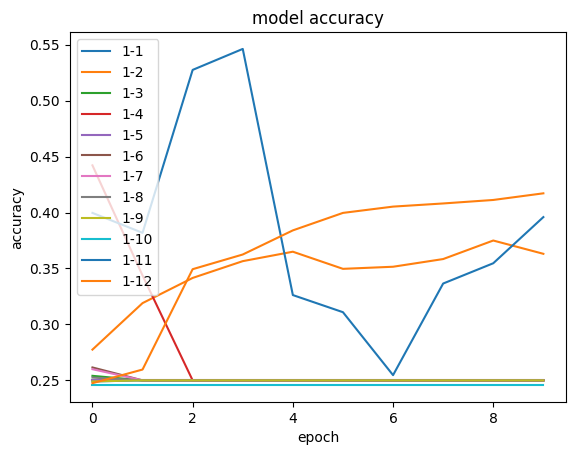

In [46]:
# Plot accuracy of the classifiers
for key, value in models_metrics.items():
	history = value[0]
	plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(models_metrics.keys(), loc='upper left')
plt.show()

#### Plot of the loss

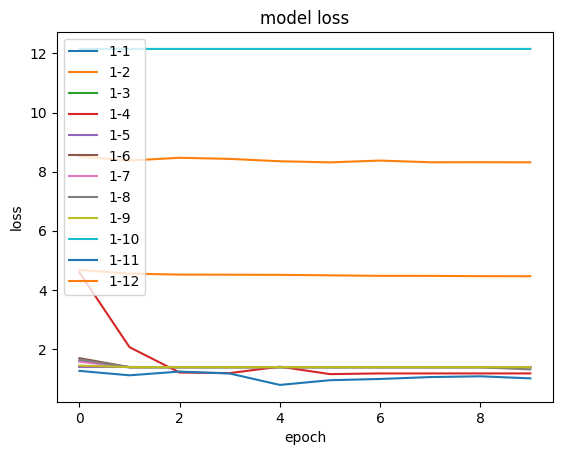

In [47]:
# Plot loss of the classifiers
for key, value in models_metrics.items():
	history = value[0]
	plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(models_metrics.keys(), loc='upper left')
plt.show()

## Deploying the best model

### Finding the best model according to the accuracy

In [48]:
best_model = None        
best_accuracy = 0        
for key, value in models_metrics.items():            
	accuracy = value[1][1]            
	if accuracy > best_accuracy:                
		best_accuracy = accuracy                
		best_model = value[2]        
print(f"Best model accuracy: {best_accuracy}")

Best model accuracy: 0.4099999964237213


### Saving the best model

In [49]:
best_model.save("../prediction-app/model/model.h5")        
print("The best model has been saved in the directory ../prediction-app/model/model.h5")

The best model has been saved in the directory ../prediction-app/model/model.h5


### Setting the name of the application

In [50]:
with open("../prediction-app/.env", "w") as file:        
	file.write("APP_NAME=\"My Prediction App for Scenario 1\"")

### Instructions for running the application

1. Open the terminal and go to the directory ../prediction-app

2. Run the command: steamlit run app.py

3. Open the browser and go to the address: http://localhost:8501